## First look at datasets

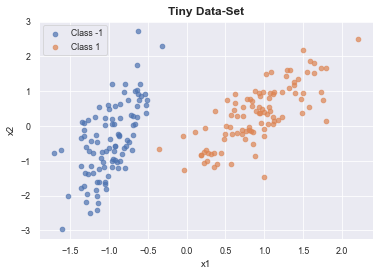

Tiny-Set:


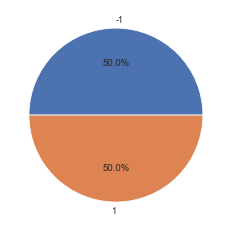

Large-Set:


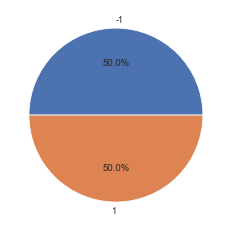

MNIST:


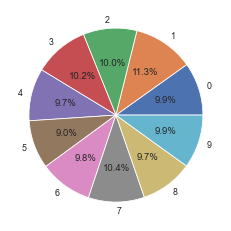

In [2]:
## Dataset tiny
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
dataloader = DataLoader()

# Tiny 
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

# Entire dataset
X = np.concatenate((xtrain, xtest))
Y = np.concatenate((ytrain, ytest))
plt.title("Tiny Data-Set", fontweight="bold", fontsize=12)
plt.scatter(X[Y==-1,0], X[Y==-1,1], label='Class -1', alpha=0.7)
plt.scatter(X[Y==1,0], X[Y==1,1], label='Class 1', alpha=0.7)
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.show()

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

print("Tiny-Set:")
plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

# Large 
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()
Y = np.concatenate((ytrain, ytest))

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

print("Large-Set:")
plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

# MNIST
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()
Y = np.concatenate((ytrain, ytest))

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

print("MNIST:")
plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

# SVM using SGD

In [3]:
from SGD import *

sgd = SGD(learning_rate=0.05)
sgd.train(xtrain, ytrain, batch_size=10, epoch_count=20)

Epoch: 0. Total error: 30449645.827064153
Epoch: 1. Total error: 5515649908184454.0
Epoch: 2. Total error: 1.6062255739838333e+22
Epoch: 3. Total error: 1.2337576614637343e+33
Epoch: 4. Total error: 2.7877124226665193e+38
Epoch: 5. Total error: 4.440036556151916e+44
Epoch: 6. Total error: 2.1079975599391305e+50
Epoch: 7. Total error: 5.809823768750024e+57
Epoch: 8. Total error: 1.6335143077469028e+65
Epoch: 9. Total error: 5.097181938671108e+71
Epoch: 10. Total error: 6.87600011882243e+80
Epoch: 11. Total error: 7.489174812722237e+86
Epoch: 12. Total error: 1.9431084329304244e+93
Epoch: 13. Total error: 2.4438995455365646e+99
Epoch: 14. Total error: 2.6550230800337943e+107
Epoch: 15. Total error: 1.6303220062616134e+115
Epoch: 16. Total error: 2.6395576200130508e+123
Epoch: 17. Total error: 1.2075220199797376e+129
Epoch: 18. Total error: 5.933944921185827e+136
Epoch: 19. Total error: 1.9728289923516505e+143


In [4]:
sgd.weight

array([-6.86152226e+68,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.03147405e+66,  3.94868228e+66,  2.80122808e+66,
        2.80122808e+66,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.80122808e+66,  3.23156309e+66,  6.03769112e+66,
        7.95288794e+66,  1.01269068e+67,  1.32323459e+67,  1.69286088e+67,
        1.99471500e+67,  2.09912206e+67,  2.13832567e+67,  2.19313957e+67,
        2.07235370e+67,  2.14835754e+67,  1.94753304e+67,  1.58632841e+67,
        1.31512231e+67,  1.15083515e+67,  7.54517698e+66,  5.71212177e+66,
        3.00582263e+66,  

## Hyperparameter Search -- Tiny

In [6]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from DataUtils import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

lrs = [0.1, 0.5, 1, 3, 5]; Cs = [0.001, 0.01, 0.1, 0.5]
batch_sizes = [10, 20, 30, 40]

results = {}
for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(lr=lr, C=C, batch_size=batch)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = DataUtils.cross_validation_score(svm, xtrain, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

  0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'cross_validation_score' is not defined

## Classification accuracy and convergence plot

In [ ]:
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

# best hyperparameters
lr = 3; C = 0.1; batch_size=10
svm = LinearSVM(lr=lr, C=C, batch_size=batch_size)
svm.fit(xtrain, ytrain)
print(f"Trainig runtime: {round(svm.runtime, 2)} s")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
#plt.ylim(min(svm.accuracies), 105)

plt.tight_layout()
plt.show()

print("\nMargins and decision boudary for test set: ")
svm.plot_margin(np.c_[xtest, np.ones(xtest.shape[0])], ytest)

# classification accuracy
print("\nClassification accuracy evaluated on test set with computed weights:", end=" ")
print(round(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest), 2)*100, "%\n")

## Hyperparameter Search -- Large

In [ ]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from DataUtils import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

lrs = [0.1, 0.5, 1, 3, 5]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [50, 100, 200]
results = {}

for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(lr=lr, C=C, batch_size=batch, max_iters=3)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = DataUtils.cross_validation_score(svm, xtrain, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

## Classification accuracy and convergence plot

In [ ]:
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

# best hyperparameters
lr = 0.1; C = 0.001; batch_size=200
svm = LinearSVM(lr=lr, C=C, batch_size=batch_size, max_iters=10, tqdm_toggle=True)
svm.fit(xtrain, ytrain)
print(f"Runtime: {round(svm.runtime, 2)} s")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
#plt.ylim(min(svm.accuracies), 105)

plt.tight_layout()
plt.show()

# classification accuracy
print("\nClassification accuracy evaluated on test set with computed weights:", end=" ")
print(round(svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest), 2)*100, "%\n")

## Hyperparameter Search -- MNIST

In [ ]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
from pprint import pprint 

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

# split 10.000 samples off xtrain and do hyperparameter-search using this validation set
indices = np.random.permutation(len(ytrain))
xtrain = xtrain[indices]
ytrain = ytrain[indices]

x_val = xtrain[:10**4]; y_val = ytrain[:10**4]
xtrain = xtrain[10**4:]; ytrain = ytrain[10**4:]

lrs = [0.01, 0.1, 0.5, 1, 3]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [100, 200, 300]

results = {}
for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch, max_iters=1)
            mc_svm.fit(xtrain, ytrain)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = mc_svm.accuracy(np.c_[x_val, np.ones(x_val.shape[0])], y_val)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

## Classification accuracy and convergence plot

In [ ]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

# best hyperparameters
lr = 0.1; C = 0.01; batch_size=200
mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch_size, max_iters=4, tqdm_toggle=True)
mc_svm.fit(xtrain, ytrain)
print(f"Runtime: {round(mc_svm.runtime, 2)} s")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("MC-Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(mc_svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(mc_svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")

plt.tight_layout()
plt.show()

# classification accuracy
print("\nClassification accuracy evaluated on test set:", end=" ")
print(round(mc_svm.accuracy(np.c_[xtest, np.ones(xtest.shape[0])], ytest), 5)*100, "%")